In [5]:
from vp_tree.simple_vp import *
from timeseries.TimeSeries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from urllib.request import urlopen
%matplotlib inline

In [6]:
sys.path.append('/Users/Elena/Desktop/TimeSeries/')

## 1. In this example we performed a knn search in a 2d set with random


In [52]:
def find_similar_pt():
    rn = lambda: random.randint(0, 10000)
    aset = [(rn(), rn()) for i in range(40000)]
    q = (rn(), rn())
    rad = 9990
    distance = lambda a, b: math.sqrt(sum([((x-y)**2) for x, y in zip(a, b)]))

    s = time.time()
    print("creating vptree...")
    root = VpNode(aset, distance=distance)
    print("vptree created", time.time() - s)
    s = time.time()
    print("searching...")

    se = VpSearch(root, q, rad, 30)
    #out = se.search()
    out = se.knn()
    for k, v in sorted(se.stat.items()):
        print(k, v)

    print("number of resultes: %s" % len(out))
    print("vptree search done, searching time", time.time() - s)

    projx = lambda x: map(lambda y: y[0], x)
    projy = lambda x: map(lambda y: y[1], x)
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].scatter(list(projx(aset)), list(projy(aset)), s = 20, alpha=0.1)
    ax[0].scatter([q[0]], [q[1]], s = 40, color='g')
    ax[0].scatter(list(projx(out)), list(projy(out)), s = 10, color='r')
    ax[0].annotate("query", xy=q)

       
    ax[1].scatter([q[0]], [q[1]], s = 40, color='g')
    ax[1].scatter(list(projx(out)), list(projy(out)), s = 10, color='r')

    plt.show()

here we find the top 30 closest points to objective point in a set of 40000 tuples. The graph below shows

creating vptree...
vptree created 3.754626989364624
searching...
expanded 8791
skipped level:1 1
skipped level:10 20
skipped level:11 31
skipped level:12 49
skipped level:13 61
skipped level:14 100
skipped level:15 133
skipped level:16 91
skipped level:4 1
skipped level:5 3
skipped level:6 7
skipped level:7 4
skipped level:8 2
skipped level:9 14
number of resultes: 30
vptree search done, searching time 0.07822108268737793


//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


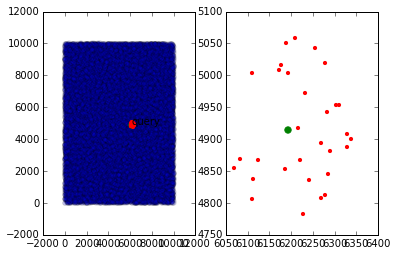

In [27]:
find_similar_pt()

## 2. VPTREE on timeseries

In [40]:
def tsmaker(m, s, j):
    "returns metadata and a time series in the shape of a jittered normal"
    t = np.arange(0.0, 1.0, 0.01)
    v = norm.pdf(t, m, s) + j*np.random.randn(100)
    return (t, v)

In [53]:
mus = np.random.uniform(low=0.0, high=1.0, size=50)
sigs = np.random.uniform(low=0.05, high=0.4, size=50)
jits = np.random.uniform(low=0.05, high=0.2, size=50)

In [54]:
ts_set = [tsmaker(m, s, j) for i, m, s, j in zip(range(50), mus, sigs, jits)]

In [55]:
ts_set[0][1]

array([ 0.02267006, -0.079369  ,  0.04532209, -0.0679564 , -0.00347947,
        0.12577635, -0.07509853,  0.17353774, -0.01533362,  0.07248418,
        0.02867034,  0.20243804,  0.09476947, -0.0170133 ,  0.06506153,
        0.16987983,  0.12059197,  0.18005903,  0.26790413,  0.23507985,
        0.25231661,  0.35806367,  0.37343344,  0.54164187,  0.56807913,
        0.4748945 ,  0.67704969,  0.67235192,  0.75078652,  0.82404172,
        0.83158721,  1.09810449,  1.22746013,  1.23191821,  1.32785638,
        1.44213462,  1.59330809,  1.69245936,  1.80823258,  1.86544623,
        1.96173508,  2.0259237 ,  2.24385829,  2.13639262,  2.38080298,
        2.44537562,  2.52570913,  2.55420934,  2.57101667,  2.71180675,
        2.74913225,  2.72559575,  2.71510386,  2.66746003,  2.63304083,
        2.63385379,  2.50532173,  2.50637374,  2.37790628,  2.35883387,
        2.26363509,  2.10332222,  2.06102182,  2.05739727,  1.86179276,
        1.75891221,  1.65140598,  1.48019896,  1.40637877,  1.25

In [50]:
def find_similar_ts():
    rn = lambda: random.randint(0, 10000)
    aset = [tsmaker(m, s, j) for i, m, s, j in zip(range(50), mus, sigs, jits)]
    q = tsmaker(mus[1], sigs[1], jits[1])
    rad = 9990
    distance = lambda a, b: math.sqrt(sum([((x-y)**2) for x, y in zip(a[1], b[1])]))

    s = time.time()
    print("creating vptree...")
    root = VpNode(aset, distance=distance)
    print("vptree created", time.time() - s)
    s = time.time()
    print("searching...")

    se = VpSearch(root, q, rad, 5)
    #out = se.search()
    out = se.knn()
    for k, v in sorted(se.stat.items()):
        print(k, v)

    print("number of resultes: %s s" % len(out))
    print("vptree search done", time.time() - s)
    
    plt.plot(q[1], label='original timeseries', linewidth=2)
    plt.plot(out[0][1], label='similar_1')
    plt.plot(out[1][1], label='similar_2')
    plt.plot(out[2][1], label='similar_3')
    plt.legend()
    plt.show()

creating vptree...
vptree created 0.030064105987548828
searching...
expanded 60
skipped level:2 1
skipped level:3 1
number of resultes: 5 s
vptree search done 0.011784076690673828


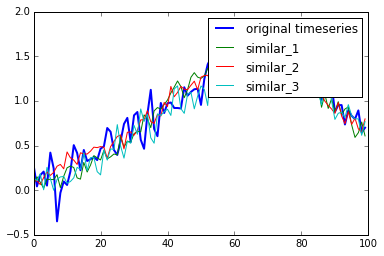

In [51]:
find_similar_ts()

creating vptree...
vptree created 0.0383450984954834
searching...
expanded 69
skipped level:3 2
skipped level:5 2
skipped level:6 3
number of resultes: 5 s
vptree search done 0.009163141250610352


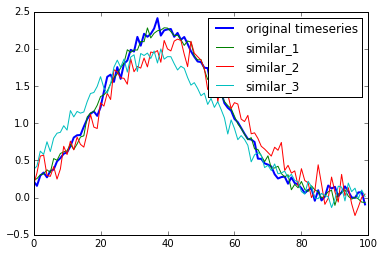

In [46]:
find_similar_ts()

creating vptree...
vptree created 0.031729936599731445
searching...
expanded 79
skipped level:4 2
skipped level:5 3
skipped level:6 2
number of resultes: 5 s
vptree search done 0.008841991424560547


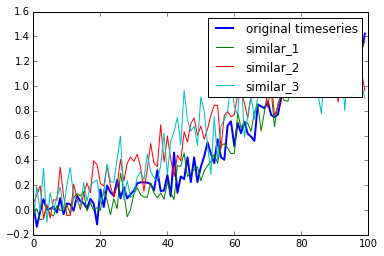

In [56]:
find_similar_ts()

## 3. VPTREE on text corpus

### Levenshtein Distance

In information theory and computer science, the Levenshtein distance is a string metric for measuring the difference between two sequences. Informally, the Levenshtein distance between two words is the minimum number of single-character edits (i.e. insertions, deletions or substitutions) required to change one word into the other. It is named after Vladimir Levenshtein, who considered this distance in 1965.[1]



In [57]:
def levenshtein(a,b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a,b = b,a
        n,m = m,n

    current = range(n+1)
    for i in range(1,m+1):
        previous, current = current, [i]+[0]*n
        for j in range(1,n+1):
            add, delete = previous[j]+1, current[j-1]+1
            change = previous[j-1]
            if a[j-1] != b[i-1]:
                change = change + 1
            current[j] = min(add, delete, change)

    return current[n]


def find_similar_ts(file_name):
    f = open(file_name)
    next(f)
    aset = [w[:-1] for w in f]
    rad = 1

    distance = levenshtein

    s = time.time()
    print("\ninput set %s points" % len(aset))
    print("creating tree...")
    root = VpNode(aset, distance=distance)
    print("created: %s nodes" % VpNode.ids)
    print("done in s: %s" % (time.time() - s))
    print("searching...")
    while True:
        q = input(">>")
        s = time.time()
        se = VpSearch(root, q, rad, 10)
        out = se.knn()
        print(se.stat)
        print("founded %s results:" % len(out))
        
        count = 1

        print("\n".join(out))
        print("done in s: %s" % (time.time() - s))

*Note*:
Since the word dictionary is really large, the below function may take over 10 mins to run:

In [ ]:
find_similar_ts('wordsEn.txt')